<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Regresión Ridge</h1>
  <h3 class="alert-heading">Alexander Muñoz Muñoz. Cod. 2218427</h3>
      <h4 class="alert-heading">Escuela de Ingeniería Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<font face="Century Gothic" size="5" color="green">**Importación de las librerías y de los datos**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import sklearn as sk
import scipy.io
from sklearn import datasets, linear_model

In [2]:
prop = scipy.io.loadmat('C:/Users/alexm/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER (1)/ALEXANDER/MANEJODEDATOS_QUÍMICA/3/prop_ccr.mat')
data = scipy.io.loadmat('C:/Users/alexm/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER (1)/ALEXANDER/MANEJODEDATOS_QUÍMICA/3/data_ms_ccr.mat')
sup = ('C:/Users/alexm/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER (1)/ALEXANDER/MANEJODEDATOS_QUÍMICA/3/Supplementary_CCR.xlsx')

In [51]:
sup_ccr = pd.read_excel(sup, sheet_name = None, header = 0)
mol = sup_ccr['spectra']
prop_sup = sup_ccr['properties']
mol2 =mol.rename(columns={'Molecules\Samples':'Moleculas'})
mol2

,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59687,C72H22O1,0.000,0.000,0.000,0.000,0.000,1.506,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59688,C63H128S2,0.000,0.000,0.000,0.000,0.000,2.188,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59689,C72H143N1,0.000,0.000,0.000,0.000,0.000,0.000,2.299,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59690,C66H74O1,0.000,0.000,0.000,0.000,0.000,0.000,2.354,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
prop_ccr=pd.DataFrame(prop['data']) 
data_ccr=pd.DataFrame(data['data1'])
#Propiedades para los crudos
prop_ccrCR=pd.DataFrame(prop_ccr.drop([21, 22, 23, 24, 25, 26, 27, 28,29, 30, 31, 32, 33, 34, 35, 36, 37,38, 39]))
#Propiedades para los fondos de vacío
prop_ccrVR=pd.DataFrame(prop_ccr.drop([0, 1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15, 16,17, 18, 19, 20]))

In [50]:
prop_ccr

,0
0,12.94
1,4.34
2,9.67
3,7.03
4,17.84
5,6.44
6,6.06
7,16.41
8,8.15
9,9.41


In [48]:
prop_ccrVR


,0
21,35.5
22,13.5
23,21.6
24,24.8
25,19.8
26,35.4
27,30.6
28,24.2
29,21.8
30,30.1


<font face="Century Gothic" size="6" color="black">**Suma total de intensidades**

In [52]:
#SUMATOTAL_
sumaTotal= mol2.sum(axis=0)
sumTotal=pd.DataFrame(sumaTotal)
sumTotal.drop(['Moleculas'], axis=0, inplace=True)
sumTotal.set_axis(['Total'], axis='columns', inplace=True)
sumTotal

,Total
CR1,12547.21
CR2,19022.551
CR3,8980.746
CR4,14442.888
CR5,21891.886
CR6,16373.753
CR7,17534.111
CR8,18324.443
CR9,18352.163
CR10,15116.284


In [14]:
CH = mol2[~mol2['Moleculas'].str.contains('S|O|N')]
CH


,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59661,C73H36,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.292,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59663,C78H66,0.000,0.000,0.000,0.000,2.127,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59664,C84H72,0.000,0.000,0.000,0.000,2.136,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59665,C88H70,0.000,0.000,0.000,0.000,2.330,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font face="Century Gothic" size="6" color="black">**Filtrado y suma por compuestos**

In [15]:
sumaCH= CH.sum(axis=0)
sumCH=pd.DataFrame(sumaCH)
sumCH.drop(['Moleculas'], axis=0, inplace=True)
sumCH.set_axis(['CH'], axis='columns', inplace=True)
sumCH
#DROP,inplace
#SETAXIS
#REINDEX
#RESETINDEX


,CH
CR1,8388.586
CR2,12142.333
CR3,5514.898
CR4,8351.545
CR5,9574.564
CR6,11320.013
CR7,10977.099
CR8,9512.965
CR9,11580.474
CR10,7248.392


In [16]:
S1= mol2[~mol2['Moleculas'].str.contains('O|N') & mol2['Moleculas'].str.contains('S1')]
S1


,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
958,C16H26S1,1.608,0.000,0.000,1.978,0.000,0.000,0.000,0.000,2.032,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
959,C16H30S1,0.000,0.000,0.000,1.986,2.796,0.000,0.000,2.665,1.803,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
960,C19H32S1,7.996,6.167,7.536,14.725,9.414,2.831,4.602,7.465,7.928,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
961,C21H28S1,7.345,9.804,7.781,12.769,34.911,9.241,12.758,23.158,7.673,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,C21H36S1,7.527,5.330,6.601,14.297,20.558,8.340,11.896,18.947,12.259,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59638,C80H150S1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,1172969.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59659,C77H22S1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59660,C84H26S1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59678,C69H70S1,0.000,0.000,0.000,0.000,2.163,0.000,0.000,0.000,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
sumaS1= S1.sum(axis=0)
sumS1=pd.DataFrame(sumaS1)
sumS1.drop(['Moleculas'], axis=0, inplace=True)
sumS1.set_axis(['S1'], axis='columns', inplace=True)
sumS1

,S1
CR1,2439.578
CR2,3510.371
CR3,2122.75
CR4,3164.825
CR5,7432.331
CR6,3362.587
CR7,4536.415
CR8,5277.192
CR9,3382.448
CR10,4886.265


In [18]:
O1= mol2[~mol2['Moleculas'].str.contains('S|N') & mol2['Moleculas'].str.contains('O1')]
O1

,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
652,C18H34O1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
653,C21H20O1,4.694,5.201,3.11,5.364,4.809,3.208,4.171,5.011,5.443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654,C20H32O1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,C20H34O1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
656,C21H32O1,2.039,3.191,0.00,2.953,0.000,0.000,0.000,0.000,2.131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59658,C86H124O1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59669,C58H50O1,0.000,0.000,0.00,0.000,2.049,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59687,C72H22O1,0.000,0.000,0.00,0.000,0.000,1.506,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59690,C66H74O1,0.000,0.000,0.00,0.000,0.000,0.000,2.354,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sumaO1= O1.sum(axis=0)
sumO1=pd.DataFrame(sumaO1)
sumO1.drop(['Moleculas'], axis=0, inplace=True)
sumO1.set_axis(['O1'], axis='columns', inplace=True)
sumO1

,O1
CR1,695.841
CR2,1288.907
CR3,284.434
CR4,696.705
CR5,652.954
CR6,804.359
CR7,499.716
CR8,921.096
CR9,1348.818
CR10,704.558


In [20]:
N1= mol2[~mol2['Moleculas'].str.contains('S|O') & mol2['Moleculas'].str.contains('N1')]
N1

,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
303,C19H17N1,0.000,0.000,0.000,2.444,3.629,0.000,0.000,2.753,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,C20H19N1,3.668,4.639,6.990,12.773,3.957,0.000,2.616,2.281,4.893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,C20H21N1,0.000,0.000,0.000,1.870,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,C20H25N1,1.785,4.716,5.060,9.273,2.581,0.000,2.731,2.843,4.063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,C21H19N1,2.813,1.964,3.061,3.024,2.054,0.000,0.000,0.000,2.095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59681,C26H19N1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59684,C69H139N1,0.000,0.000,0.000,0.000,0.000,1.728,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59685,C93H31N1,0.000,0.000,0.000,0.000,0.000,1.702,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59686,C91H79N1,0.000,0.000,0.000,0.000,0.000,1.521,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
sumaN1= N1.sum(axis=0)
sumN1=pd.DataFrame(sumaN1)
sumN1.drop(['Moleculas'], axis=0, inplace=True)
sumN1.set_axis(['N1'], axis='columns', inplace=True)
sumN1

,N1
CR1,901.83
CR2,1202.685
CR3,949.856
CR4,1636.972
CR5,1748.53
CR6,667.165
CR7,1159.068
CR8,1336.138
CR9,1745.1
CR10,1296.459


In [22]:
S1O1= mol2[~mol2['Moleculas'].str.contains('N') & mol2['Moleculas'].str.contains('S1O1')]
S1O1

,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
7876,C27H4S1O1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
7877,C28H14S1O1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
7878,C31H38S1O1,0.0,0.0,0.0,0.0,2.946,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,616212.062,0.0,0.0,0.0,0.000
7879,C32H36S1O1,0.0,0.0,0.0,0.0,3.707,0.0,0.0,0.0,0.0,...,755230.625,0.0,0.0,0.0,0.0,1187880.625,0.0,0.0,0.0,1830152.625
7880,C37H18S1O1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,607274.312,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59673,C25H26S1O1,0.0,0.0,0.0,0.0,2.148,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
59674,C26H32S1O1,0.0,0.0,0.0,0.0,3.746,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
59675,C28H34S1O1,0.0,0.0,0.0,0.0,3.529,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
59676,C28H44S1O1,0.0,0.0,0.0,0.0,2.694,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000


In [23]:
sumaS1O1= S1O1.sum(axis=0)
sumS1O1=pd.DataFrame(sumaS1O1)
sumS1O1.drop(['Moleculas'], axis=0, inplace=True)
sumS1O1.set_axis(['S1O1'], axis='columns', inplace=True)
sumS1O1

,S1O1
CR1,0.0
CR2,0.0
CR3,0.0
CR4,0.0
CR5,326.932
CR6,0.0
CR7,0.0
CR8,0.0
CR9,0.0
CR10,0.0


In [24]:
N1O1= mol2[~mol2['Moleculas'].str.contains('S') & mol2['Moleculas'].str.contains('N1O1')]
N1O1

,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
508,C23H23N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
509,C24H25N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
510,C24H33N1O1,0.0,0.0,0.0,2.802,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
511,C24H35N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
512,C25H25N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58336,C88H31N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,691755.000,0.0
58337,C88H77N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752383.062,0.0
58338,C78H33N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,701485.312,0.0
58339,C85H129N1O1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,706381.312,0.0


In [25]:
sumaN1O1= N1O1.sum(axis=0)
sumN1O1=pd.DataFrame(sumaN1O1)
sumN1O1.drop(['Moleculas'], axis=0, inplace=True)
sumN1O1.set_axis(['N1O1'], axis='columns', inplace=True)
sumN1O1

,N1O1
CR1,0.0
CR2,0.0
CR3,0.0
CR4,115.121
CR5,0.0
CR6,0.0
CR7,0.0
CR8,0.0
CR9,0.0
CR10,0.0


In [26]:
N1S1= mol2[~mol2['Moleculas'].str.contains('O') & mol2['Moleculas'].str.contains('N1S1')]
N1S1

,Moleculas,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
579,C22H19N1S1,0.0,0.0,0.0,0.00,2.255,0.0,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
580,C23H27N1S1,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
581,C24H23N1S1,0.0,0.0,0.0,0.00,4.770,0.0,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
582,C25H25N1S1,0.0,0.0,0.0,1.84,3.629,0.0,0.0,2.046,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
583,C26H29N1S1,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58589,C74H113N1S1,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1031848.312,0.0
58590,C89H11N1S1,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,672764.500,0.0
59611,C67H83N1S1,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.000,0.0,...,0.0,912963.938,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
59667,C39H73N1S1,0.0,0.0,0.0,0.00,2.046,0.0,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0


In [27]:
sumaN1S1= N1S1.sum(axis=0)
sumN1S1=pd.DataFrame(sumaN1S1)
sumN1S1.drop(['Moleculas'], axis=0, inplace=True)
sumN1S1.set_axis(['N1S1'], axis='columns', inplace=True)
sumN1S1

,N1S1
CR1,0.0
CR2,0.0
CR3,0.0
CR4,103.72
CR5,419.908
CR6,0.0
CR7,0.0
CR8,232.005
CR9,0.0
CR10,152.407


<font face="Century Gothic" size="6" color="black">**Concatenación de los datos filtrados sin normalizar**

In [54]:
General=pd.concat([sumCH, sumO1, sumN1, sumS1, sumS1O1, sumN1O1, sumN1S1, sumTotal ], axis=1)
General

,CH,O1,N1,S1,S1O1,N1O1,N1S1,Total
CR1,8388.586,695.841,901.83,2439.578,0.0,0.0,0.0,12547.21
CR2,12142.333,1288.907,1202.685,3510.371,0.0,0.0,0.0,19022.551
CR3,5514.898,284.434,949.856,2122.75,0.0,0.0,0.0,8980.746
CR4,8351.545,696.705,1636.972,3164.825,0.0,115.121,103.72,14442.888
CR5,9574.564,652.954,1748.53,7432.331,326.932,0.0,419.908,21891.886
CR6,11320.013,804.359,667.165,3362.587,0.0,0.0,0.0,16373.753
CR7,10977.099,499.716,1159.068,4536.415,0.0,0.0,0.0,17534.111
CR8,9512.965,921.096,1336.138,5277.192,0.0,0.0,232.005,18324.443
CR9,11580.474,1348.818,1745.1,3382.448,0.0,0.0,0.0,18352.163
CR10,7248.392,704.558,1296.459,4886.265,0.0,0.0,152.407,15116.284


<font face="Century Gothic" size="6" color="black">**Concatenación de los datos filtrados normalizados**

In [29]:
IRCH=General['CH']/General['Total']
IRO1=General['O1']/General['Total']
IRN1=General['N1']/General['Total']
IRS1=General['S1']/General['Total']
IRS1O1=General['S1O1']/General['Total']
IRN1O1=General['N1O1']/General['Total']
IRN1S1=General['N1S1']/General['Total']

#IRGeneral=pd.DataFrame(IRCH,IRO1,IRN1,IRS1,IRS1O1,IRN1O1,IRN1S1)

irCH=pd.DataFrame(IRCH)
irCH.set_axis(['CH'], axis='columns', inplace=True)
irO1=pd.DataFrame(IRO1)
irO1.set_axis(['O1'], axis='columns', inplace=True)
irN1=pd.DataFrame(IRN1)
irN1.set_axis(['N1'], axis='columns', inplace=True)
irS1=pd.DataFrame(IRS1)
irS1.set_axis(['S1'], axis='columns', inplace=True)
irS1O1=pd.DataFrame(IRS1O1)
irS1O1.set_axis(['S1O1'], axis='columns', inplace=True)
irN1O1=pd.DataFrame(IRN1O1)
irN1O1.set_axis(['N1O1'], axis='columns', inplace=True)
irN1S1=pd.DataFrame(IRN1S1)
irN1S1.set_axis(['N1S1'], axis='columns', inplace=True)
irGeneral=pd.concat([irCH, irO1, irN1, irS1, irS1O1, irN1O1, irN1S1 ], axis=1)
irGeneral

,CH,O1,N1,S1,S1O1,N1O1,N1S1
CR1,0.668562,0.055458,0.071875,0.194432,0.0,0.0,0.0
CR2,0.638313,0.067757,0.063224,0.184537,0.0,0.0,0.0
CR3,0.61408,0.031672,0.105766,0.236367,0.0,0.0,0.0
CR4,0.578246,0.048239,0.113341,0.219127,0.0,0.007971,0.007181
CR5,0.437357,0.029826,0.079871,0.339502,0.014934,0.0,0.019181
CR6,0.691351,0.049125,0.040746,0.205364,0.0,0.0,0.0
CR7,0.626043,0.0285,0.066104,0.258719,0.0,0.0,0.0
CR8,0.519141,0.050266,0.072916,0.287986,0.0,0.0,0.012661
CR9,0.631014,0.073496,0.09509,0.184308,0.0,0.0,0.0
CR10,0.479509,0.046609,0.085766,0.323245,0.0,0.0,0.010082


In [30]:
irGeneral.axes

[Index(['CR1', 'CR2', 'CR3', 'CR4', 'CR5', 'CR6', 'CR7', 'CR8', 'CR9', 'CR10',
        'CR11', 'CR12', 'CR13', 'CR14', 'CR15', 'CR16', 'CR17', 'CR18', 'CR19',
        'CR20', 'CR21', 'VR1', 'VR2', 'VR3', 'VR4', 'VR5', 'VR6', 'VR7', 'VR8',
        'VR9', 'VR10', 'VR11', 'VR12', 'VR13', 'VR14', 'VR15', 'VR16', 'VR17',
        'VR18', 'VR19'],
       dtype='object'),
 Index(['CH', 'O1', 'N1', 'S1', 'S1O1', 'N1O1', 'N1S1'], dtype='object')]

In [31]:
irGeneralCR=irGeneral.drop(['VR1', 'VR2', 'VR3', 'VR4', 'VR5', 'VR6', 'VR7', 'VR8',
        'VR9', 'VR10', 'VR11', 'VR12', 'VR13', 'VR14', 'VR15', 'VR16', 'VR17',
        'VR18', 'VR19'])
irGeneralCR


,CH,O1,N1,S1,S1O1,N1O1,N1S1
CR1,0.668562,0.055458,0.071875,0.194432,0.0,0.0,0.0
CR2,0.638313,0.067757,0.063224,0.184537,0.0,0.0,0.0
CR3,0.61408,0.031672,0.105766,0.236367,0.0,0.0,0.0
CR4,0.578246,0.048239,0.113341,0.219127,0.0,0.007971,0.007181
CR5,0.437357,0.029826,0.079871,0.339502,0.014934,0.0,0.019181
CR6,0.691351,0.049125,0.040746,0.205364,0.0,0.0,0.0
CR7,0.626043,0.0285,0.066104,0.258719,0.0,0.0,0.0
CR8,0.519141,0.050266,0.072916,0.287986,0.0,0.0,0.012661
CR9,0.631014,0.073496,0.09509,0.184308,0.0,0.0,0.0
CR10,0.479509,0.046609,0.085766,0.323245,0.0,0.0,0.010082


In [33]:
irGeneralVR=irGeneral.drop(['CR1', 'CR2', 'CR3', 'CR4', 'CR5', 'CR6', 'CR7', 'CR8', 'CR9', 'CR10',
        'CR11', 'CR12', 'CR13', 'CR14', 'CR15', 'CR16', 'CR17', 'CR18', 'CR19',
        'CR20', 'CR21'])
irGeneralVR

,CH,O1,N1,S1,S1O1,N1O1,N1S1
VR1,0.343683,0.076668,0.056028,0.101547,0.036444,0.015258,0.008838
VR2,0.361999,0.05355,0.057395,0.141908,0.012878,0.012293,0.010253
VR3,0.332385,0.079933,0.120749,0.167568,0.041888,0.033034,0.020924
VR4,0.595979,0.092161,0.048809,0.166253,0.035698,0.007674,0.001797
VR5,0.379562,0.041242,0.073263,0.12297,0.017193,0.014196,0.015987
VR6,0.357784,0.074986,0.077247,0.226766,0.045057,0.012482,0.021702
VR7,0.468862,0.122524,0.105832,0.14077,0.047594,0.024794,0.010005
VR8,0.275856,0.070578,0.078357,0.218252,0.056264,0.018866,0.018827
VR9,0.464674,0.048482,0.132055,0.253674,0.006337,0.008322,0.015365
VR10,0.247601,0.063119,0.045408,0.106774,0.023596,0.011772,0.014802


<font face="Century Gothic" size="5" color="green">**Modelo**

In [60]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge1 = Ridge(normalize = True)
coefs1 = []
for a in alphas:
    ridge1.set_params(alpha = a)
    ridge1.fit(irGeneralCR, prop_ccrCR)
    coefs1.append(ridge1.coef_)
np.shape(coefs1)
coefs1=np.array(coefs1)
coef1=coefs1.reshape(100, 1*7)
np.shape(coef1)

(100, 7)

<font face="Century Gothic" size="4" color="black">**CRUDOS CR**

<font face="Century Gothic" size="4" color="black">**Set de entranamiento y de prueba, cálculo del error de la regresión (MSE) y del alfa asociado a ese MSE en un random state mutilple**

In [102]:
N = np.array(range(1000))
miniCR = []
AlphasCR = []
for i in N:
    irGeneralCR_train, irGeneralCR_test , prop_ccrCR_train, prop_ccrCR_test = train_test_split(irGeneralCR, prop_ccrCR, test_size=0.2, random_state=i)
    ridgeCR = Ridge(normalize = True)
    coefsCR = []
    predsCR = []
    msesCR = [] 
    
    for a in alphas:
        ridgeCR.set_params(alpha = a)
        ridgeCR.fit(irGeneralCR_train, prop_ccrCR_train)
        predCR = ridgeCR.predict(irGeneralCR_test)  
        mseCR = mean_squared_error(prop_ccrCR_test, predCR)
        coefsCR.append(ridgeCR.coef_)
        predsCR.append(predCR)
        msesCR.append(mseCR)
    minimoCR = np.min(msesCR)
    index = msesCR.index(minimoCR)
    miniCR.append(minimoCR)
    AlphasCR.append(alphas[index])
minimoCR_2 = np.min(miniCR)
index_2 = miniCR.index(minimoCR_2)
AlphasCR_min = AlphasCR[index_2]
irGeneralCR_train, irGeneralCR_test , prop_ccrCR_train, prop_ccrCR_test = train_test_split(irGeneralCR, prop_ccrCR, test_size=0.2, random_state=index_2)
print("El mínimo mse es:")
print(minimoCR_2)
print("El alfa que corresponde a este minimo es:")
print(AlphasCR_min)


El mínimo mse es:
0.44963390854437113
El alfa que corresponde a este minimo es:
0.10772173450159389


In [103]:
ridge2 = Ridge(AlphasCR[index_2], normalize = True) #Descripción del modelo
ridge2.fit(irGeneralCR_train, prop_ccrCR_train)             # Ajuste del modelo con el set de entrenamiento
pred2 = ridge2.predict(irGeneralCR_test)           # Usamos el modelo para predecir sobre los datos de prueba
print(pd.DataFrame(ridge2.coef_.T, index = irGeneralCR.columns, columns=['CoefsCR'])) # imprimos los coeficientes
print(mean_squared_error(prop_ccrCR_test, pred2))          # Calculamos el MSE sobre los datos de prueba

         CoefsCR
CH     -2.634830
O1    -32.336102
N1      6.602347
S1     -6.250239
S1O1  236.825940
N1O1 -441.186633
N1S1  360.659589
0.44963390854437113


In [104]:
pccrCRtest=prop_ccrCR_test.to_numpy()
pccrCRtest

array([[4.87],
       [8.15],
       [8.32],
       [5.34],
       [9.67]])

Text(0, 0.5, 'CR_modelo')

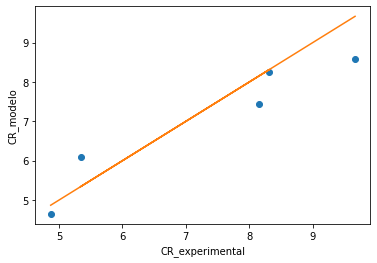

In [105]:
#Gráfica de los valores predichos vs los datos experimentales
plt.plot(pccrCRtest, pred2, 'o')
plt.plot(pccrCRtest, pccrCRtest)
plt.xlabel('CR_experimental')
plt.ylabel('CR_modelo')


<font face="Century Gothic" size="4" color="black">**FONDOS DE VACIO VR**

<font face="Century Gothic" size="4" color="black">**Set de entranamiento y de prueba, cálculo del error de la regresión (MSE) y del alfa asociado a ese MSE en un random state mutilple**

In [106]:
N = np.array(range(1000))
miniVR = []
AlphasVR = []
for i in N:
    irGeneralVR_train, irGeneralVR_test , prop_ccrVR_train, prop_ccrVR_test = train_test_split(irGeneralVR, prop_ccrVR, test_size=0.2, random_state=i)
    ridgeVR = Ridge(normalize = True)
    coefsVR = []
    predsVR = []
    msesVR = [] 
    for a in alphas:
        ridgeVR.set_params(alpha = a)
        ridgeVR.fit(irGeneralVR_train, prop_ccrVR_train)
        predVR = ridgeVR.predict(irGeneralVR_test)  
        mseVR = mean_squared_error(prop_ccrVR_test, predVR)
        coefsVR.append(ridgeVR.coef_)
        predsVR.append(predVR)
        msesVR.append(mseVR)
    minimoVR = np.min(msesVR)
    index = msesVR.index(minimoVR)
    miniVR.append(minimoVR)
    AlphasVR.append(alphas[index])
minimoVR_2 = np.min(miniVR)
index_3 = miniVR.index(minimoVR_2)
AlphaVR_min = AlphasVR[index_3]
print("El mínimo mse es:")
print(minimoVR_2)
print("El alfa que corresponde a este minimo es:")
print(AlphaVR_min)
irGeneralVR_train, irGeneralVR_test , prop_ccrVR_train, prop_ccrVR_test = train_test_split(irGeneralVR, prop_ccrVR, test_size=0.2, random_state=index_3)

El mínimo mse es:
1.4609301520386364
El alfa que corresponde a este minimo es:
0.005


In [107]:
ridge3 = Ridge(alpha = AlphaVR_min, normalize = True) #Descripción del modelo
ridge3.fit(irGeneralVR_train, prop_ccrVR_train)             # Ajuste del modelo con el set de entrenamiento
pred3 = ridge3.predict(irGeneralVR_test)           # Usamos el modelo para predecir sobre los datos de prueba
print(pd.DataFrame(ridge3.coef_.T, index = irGeneralVR.columns, columns=['CoefsVR'])) # imprimos los coeficientes
print(mean_squared_error(prop_ccrVR_test, pred3))          # Calculamos el MSE sobre los datos de prueba

         CoefsVR
CH     -5.933614
O1     10.183872
N1    103.216614
S1    -78.333829
S1O1  457.344778
N1O1 -936.084860
N1S1  382.018468
1.4609301520386364


In [108]:
pccrVRtest=prop_ccrVR_test.to_numpy()
pccrVRtest

array([[20.6],
       [21.6],
       [32.6],
       [18.3]])

Text(0, 0.5, 'VR_modelo')

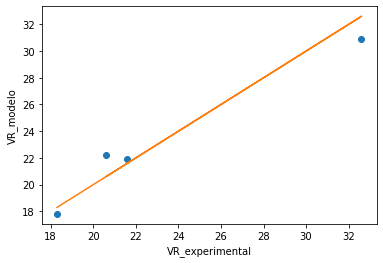

In [109]:
#Gráfica de los valores predichos vs los datos experimentales
plt.plot(pccrVRtest, pred3, 'o')
plt.plot(pccrVRtest, pccrVRtest)
plt.xlabel('VR_experimental')
plt.ylabel('VR_modelo')